<a href="https://colab.research.google.com/github/arora123/Statistics-for-Data-Science-using-Python/blob/main/OTS_Session_6_Data_Viz_using_Seaborn_Par2_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Using seaborn library for creating

- Scatter plots
- regression plots

Basically exploring relation ship between multiple variables in a dataset, where we are focusing mainly relationship was between two numerical variables {may for some categories of different categorical variables]

Importing libraries

In [ ]:
import pandas as pd
# Matplotlib for additional customization
import matplotlib.pyplot as plt
# Seaborn for plotting and styling
import seaborn as sns

# For loading in built data sets
# 1. 
# from sklearn import datasets
# loading data set
# datasets.load_boston()

# 2.
# installing pydataset package for using inbuilt data sets
!pip install pydataset
#importing pydatasets
from pydataset import data

# 3. sns.load_dataset('iris')


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


     |████████████████████████████████| 15.9MB 294kB/s 
  Created wheel for pydataset: filename=pydataset-0.2.0-cp36-none-any.whl size=15939430 sha256=ac8cda186fc301594747f0b85e48059d850993f01542f16e4f39d787050d02cc
  Stored in directory: /root/.cache/pip/wheels/fe/3f/dc/5d02ccc767317191b12d042dd920fcf3432fab74bc7978598b
Successfully built pydataset
initiated datasets repo at: /root/.pydataset/


Loading data set

In [ ]:
df = data('mtcars')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32 entries, Mazda RX4 to Volvo 142E
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   mpg     32 non-null     float64
 1   cyl     32 non-null     int64  
 2   disp    32 non-null     float64
 3   hp      32 non-null     int64  
 4   drat    32 non-null     float64
 5   wt      32 non-null     float64
 6   qsec    32 non-null     float64
 7   vs      32 non-null     int64  
 8   am      32 non-null     int64  
 9   gear    32 non-null     int64  
 10  carb    32 non-null     int64  
dtypes: float64(5), int64(6)
memory usage: 3.0+ KB


## Scatterplot
Two numerical variables
Two numerical variables & upto four categorical variables using asthetics and faceting


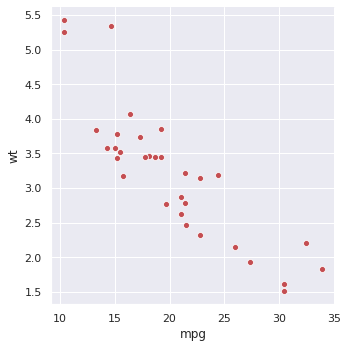

In [ ]:
# Setting style _ optional
sns.set(style='darkgrid', palette='deep')
# scatterplot between mpg and wt
# sns.relplot('mpg', 'wt', data=df)
# we can also use sns.scatterplot() function

# adding colors
sns.relplot('mpg', 'wt', data=df, color='r')

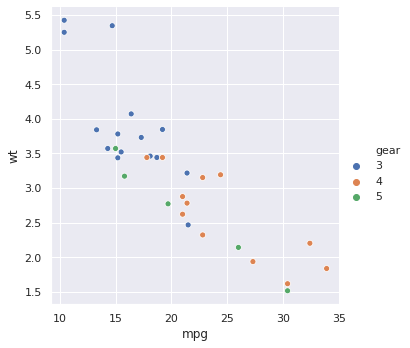

In [ ]:
# Two numeric & one categorical variable
# sns.relplot('mpg', 'wt', hue = 'gear', data = df)
# not working as expected as 'gear' variable is of 'int' data type
# we need to convert 'gear' to categorical data type

sns.relplot('mpg', 'wt', hue = df.gear.astype('category'), data = df)

# sns.scatterplot('mpg', 'wt', hue = df.gear.astype('category'), data = df) alternate way

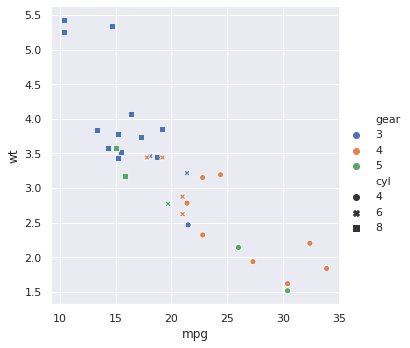

In [ ]:
# Two numeric and two categorical variables

sns.relplot('mpg', 'wt', hue = df.gear.astype('category'), style = df.cyl.astype('category'),  data = df)



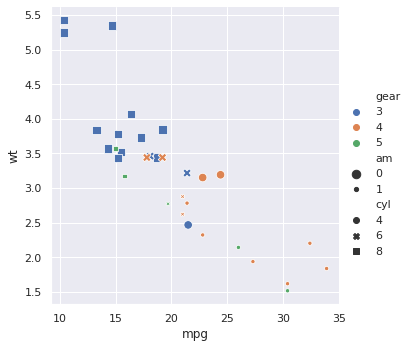

In [ ]:
# Two numeric and three categorical variables

sns.relplot('mpg', 'wt', hue = df.gear.astype('category'), style = df.cyl.astype('category'), size = df.am.astype('category'), data = df)

### Adding faceting

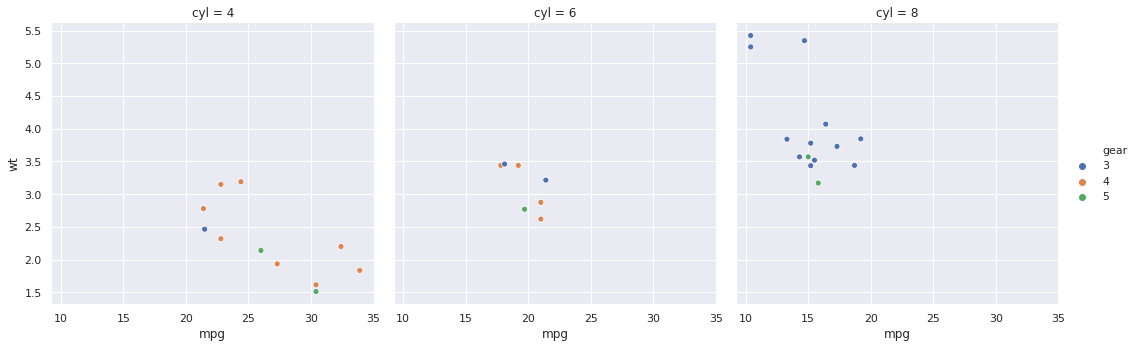

In [ ]:
# Column wise faceting
sns.relplot('mpg', 'wt', hue = df.gear.astype('category'), col = 'cyl', data = df)

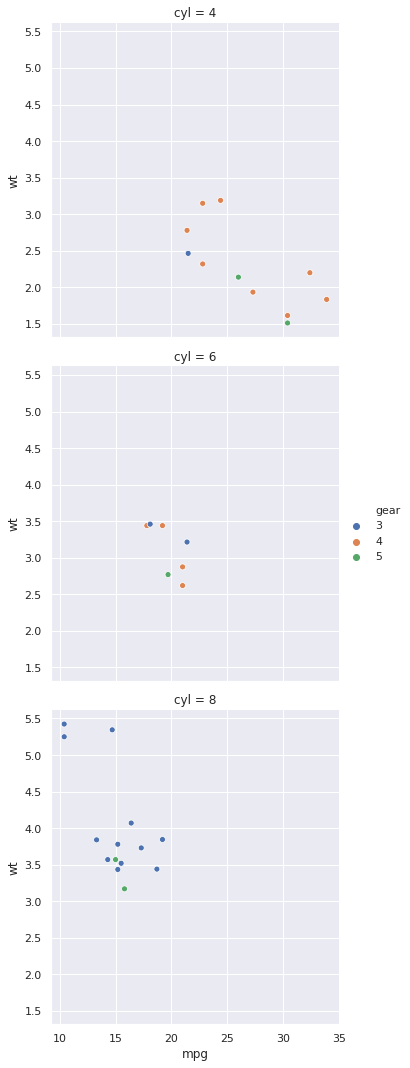

In [ ]:
# Row wise faceting
sns.relplot('mpg', 'wt', hue = df.gear.astype('category'), row = 'cyl', data = df)

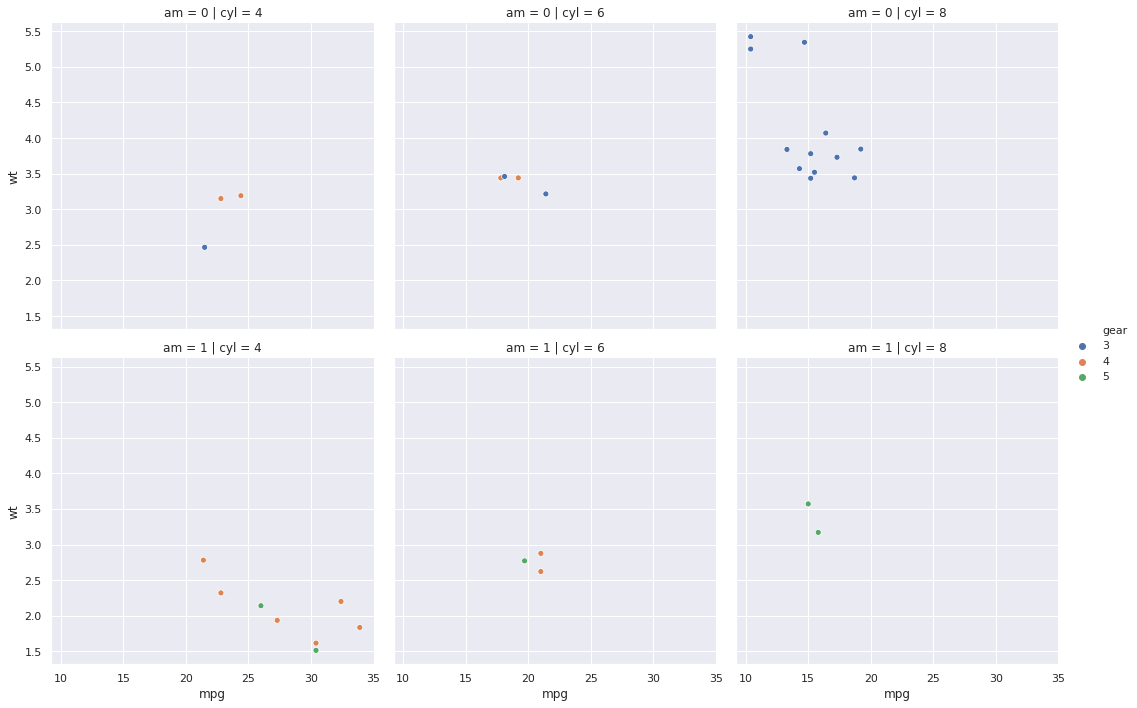

In [ ]:
# Both Column & Row wise faceting
sns.relplot('mpg', 'wt', hue = df.gear.astype('category'), col = 'cyl', row = 'am', data = df)

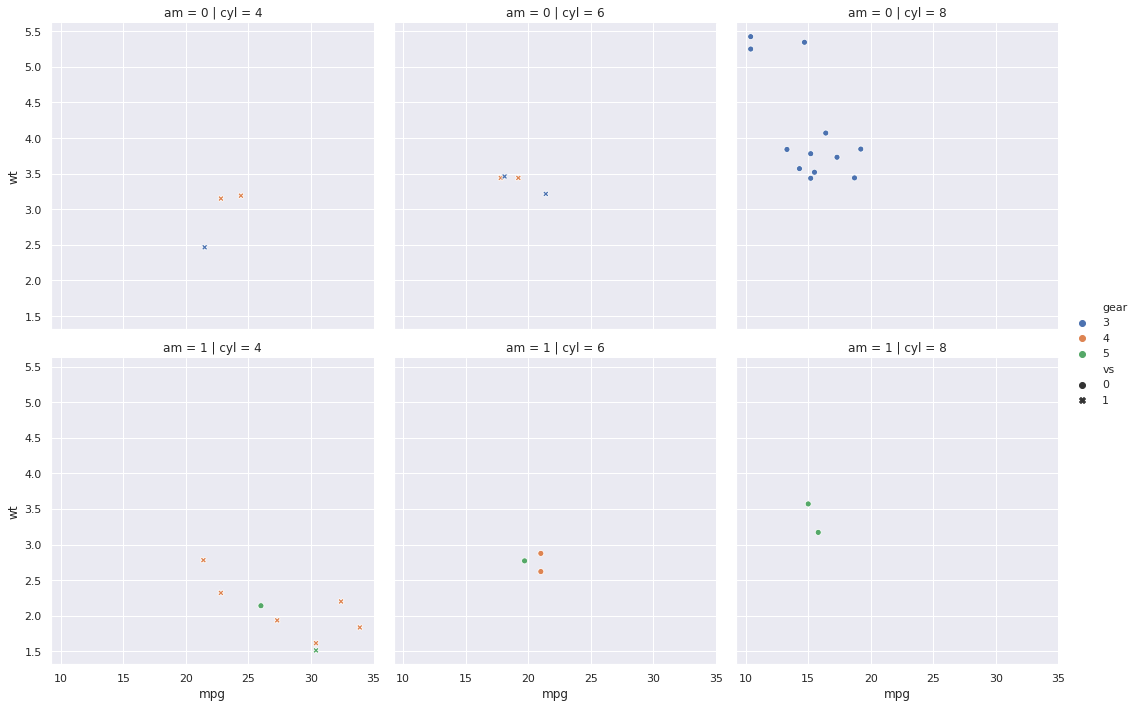

In [ ]:
# Visualizing six variables
sns.relplot('mpg', 'wt', hue = df.gear.astype('category'), style=df.vs.astype('category'), col = 'cyl', row = 'am', data = df)

## Line Charts

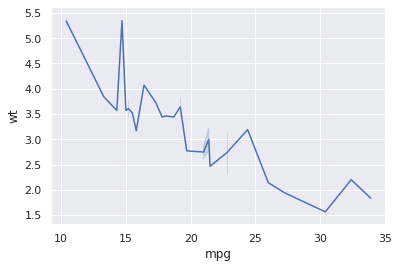

In [ ]:
# line chart [mostly used for time series data]
# sns.relplot('mpg', 'wt', data=df, kind = 'line') # default  is kind = 'scatter'

sns.lineplot('mpg', 'wt', data=df) # alternate way

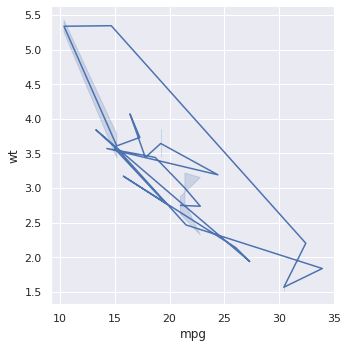

In [ ]:
# Because lineplot() assumes that you are most often trying to draw y as a function of x, the default behavior is to sort the data by the x values before plotting. 
# However, this can be disabled

sns.relplot('mpg', 'wt', data=df, kind = 'line', sort=False)

# more on time series data
# https://seaborn.pydata.org/tutorial/relational.html

# You can add upto three additional variables by modifying the hue, size, and style of the plot elements

## Functions to draw linear regression model

both sns.regplot() and sns.lmplot() plotsthe resulting regression line and a 95% confidence interval for that regression:

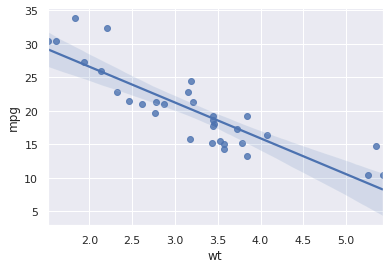

In [ ]:
sns.regplot('wt', 'mpg', data = df) 

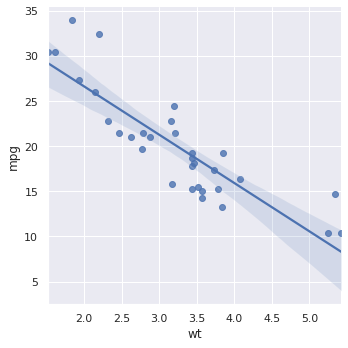

In [ ]:
sns.lmplot('wt', 'mpg', data = df) 

Let's explore regression plots for some other data set

In [ ]:
anscombe = sns.load_dataset("anscombe")
print(anscombe.shape)
print(anscombe.head())
anscombe.tail()

(44, 3)


,dataset,x,y
39,IV,8.0,5.25
40,IV,19.0,12.50
41,IV,8.0,5.56
42,IV,8.0,7.91
43,IV,8.0,6.89


In [ ]:
anscombe.dataset.unique()

array(['I', 'II', 'III', 'IV'], dtype=object)

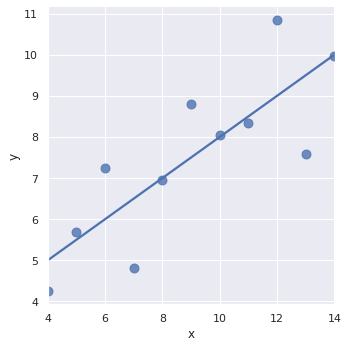

In [ ]:
# linear regression line for 'dataset == I'  looks fine
sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'I'"),
           ci=None)

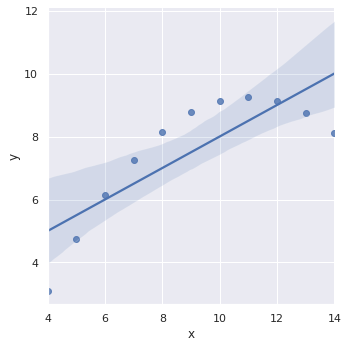

In [ ]:
# linear regression line for 'dataset == II' ___ Doesn't fit well
sns.lmplot(x='x', y='y', data=anscombe.query("dataset == 'II'"), ci=90) # 90 % confidence interval

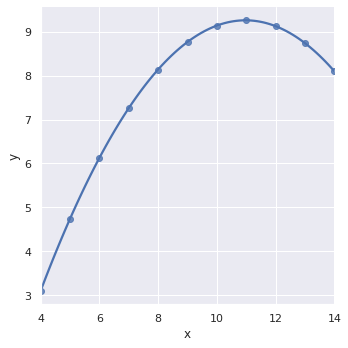

In [ ]:
# we can fit second order polynomial here __ Looks fine
sns.lmplot('x', 'y', data=anscombe.query("dataset == 'II'"), order=2)

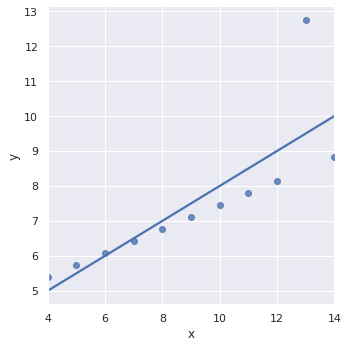

In [ ]:
# If we have outliers__ 
sns.lmplot('x', 'y', data=anscombe.query("dataset == 'III'"), ci= None)

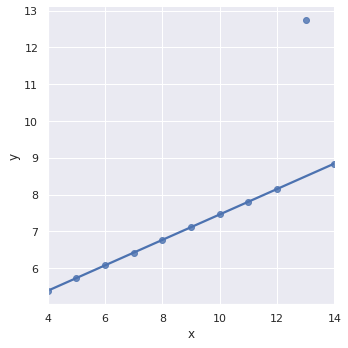

In [ ]:
# In the presence of outliers, it can be useful to fit a robust regression, which uses a different loss function to downweight relatively large residuals:
sns.lmplot('x', 'y', data=anscombe.query("dataset == 'III'"), ci=None, robust=True)

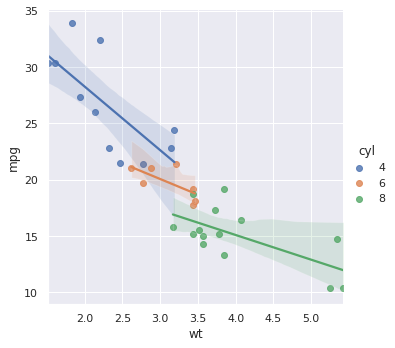

In [ ]:
# linear regression for different categories for categorical variable
sns.lmplot('wt', 'mpg', hue='cyl', data=df)

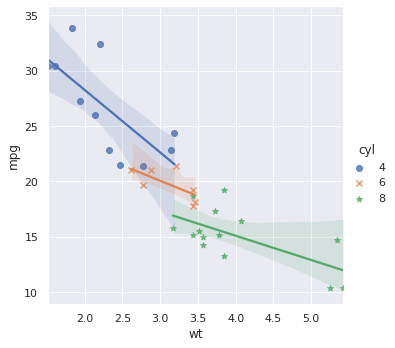

In [ ]:
# adding markers
sns.lmplot('wt', 'mpg', hue='cyl', markers=['o', 'x', '*'], data=df)

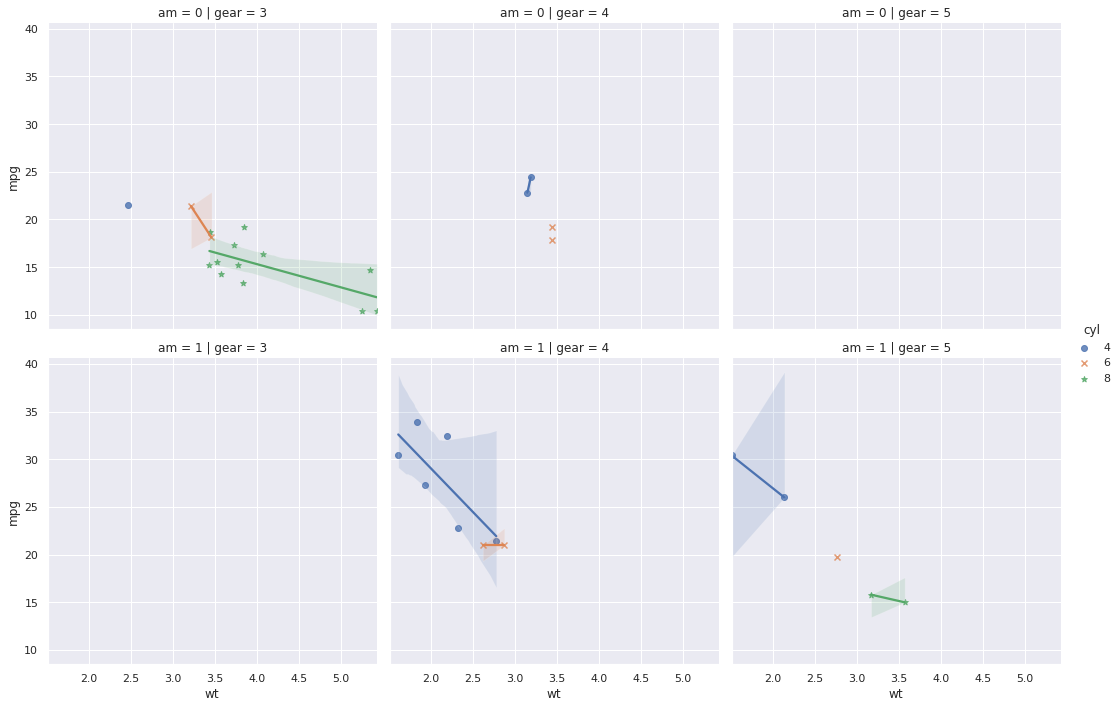

In [ ]:
# Faceting
sns.lmplot('wt', 'mpg', hue='cyl', markers=['o', 'x', '*'], col='gear', row='am', data=df)

# Joint Plots for scatter plots and distributions
# Scatterplot matrix

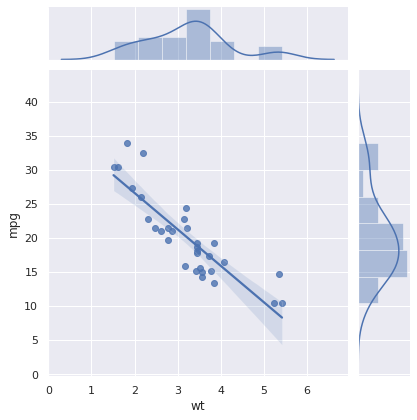

In [ ]:
sns.jointplot('wt', 'mpg', data=df, kind='reg')
# Shows distribution of response and predictor vatiables along with the scatter plot

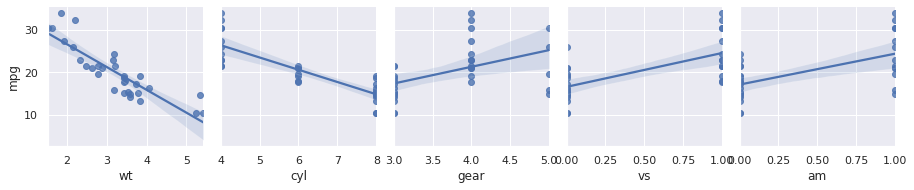

In [ ]:
sns.pairplot(x_vars=['wt', 'cyl', 'gear', 'vs', 'am'], y_vars=['mpg'], data=df, kind='reg')

In [ ]:
tips = sns.load_dataset('tips')
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [ ]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.3 KB


In [ ]:
tips.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000
